In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd = pd.read_csv('Greenhouse-gas-emissions-by-region-industry-and-household-Year-ended-2019-csv.csv')
cd

,region,anzsic_descriptor,anzsic_descriptor2,category,gas,units,magnitude,year,data_val
0,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2007,46.04
1,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2008,46.03
2,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2009,43.55
3,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2010,39.58
4,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2011,42.05
...,...,...,...,...,...,...,...,...,...
5702,West Coast,Total,Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2019,1392.99
5703,West Coast,Total,Total,Total,Carbon dioxide,Kilotonnes,Carbon dioxide equivalents,2019,698.96
5704,West Coast,Total,Total,Total,Methane,Kilotonnes,Carbon dioxide equivalents,2019,511.00
5705,West Coast,Total,Total,Total,Nitrous oxide,Kilotonnes,Carbon dioxide equivalents,2019,162.24


In [3]:
cd.columns

Index(['region', 'anzsic_descriptor', 'anzsic_descriptor2', 'category', 'gas',
       'units', 'magnitude', 'year', 'data_val'],
      dtype='object')

In [4]:
cd[['year', 'data_val']]

,year,data_val
0,2007,46.04
1,2008,46.03
2,2009,43.55
3,2010,39.58
4,2011,42.05
...,...,...
5702,2019,1392.99
5703,2019,698.96
5704,2019,511.00
5705,2019,162.24


In [5]:
'West Coast' in cd['region'].values
'West Coast' in cd['region'].unique()

True

In [6]:
cda = cd.fillna(0).groupby('region').agg(sum_gas = ('data_val', np.sum))
cda

,sum_gas
region,
Auckland,703839.02
Bay of Plenty,208280.09
Canterbury,714321.13
Gisborne,90865.70
Hawke's Bay,213182.03
Manawatu-Whanganui,383396.93
Marlborough,48252.89
Nelson,21783.11
Northland,335660.58


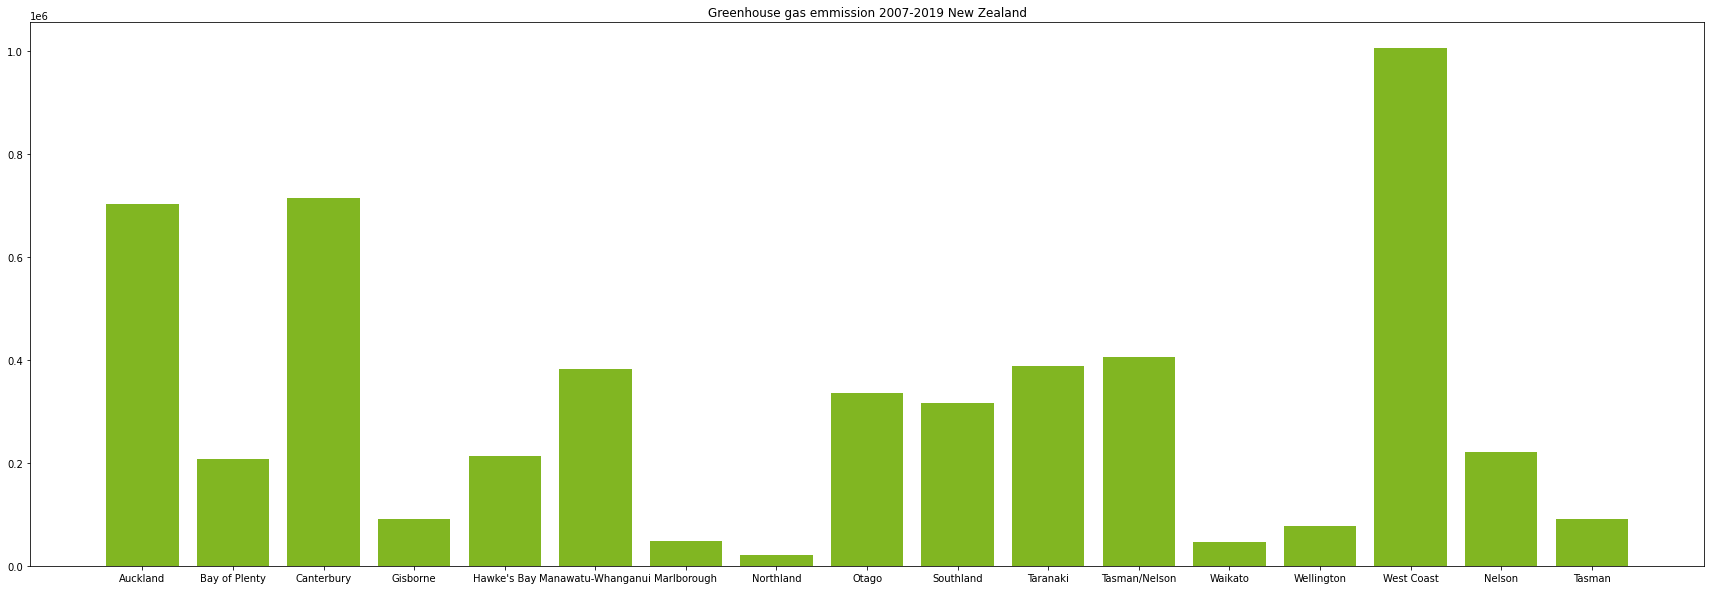

In [7]:
fig, axs = plt.subplots(figsize=(30, 10)) 
y_pos = np.arange(len(cda['sum_gas']))
plt.bar(cd['region'].unique(), cda['sum_gas'], color = '#81B622')
plt.title("Greenhouse gas emmission 2007-2019 New Zealand")
plt.show()